# Auto Incoder

# 기본 오토 인코더 활용 노이즈 제거

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
import numpy as np
import os
from keras.preprocessing.image import load_img, img_to_array
from matplotlib import pyplot as plt

# 노이즈가 있는 이미지와 깨끗한 이미지 경로 설정
noisy_imgs_path = 'Noisy_Documents/noisy/'
clean_imgs_path = 'Noisy_Documents/clean/'

X_train_noisy = []
X_train_clean = []

# 이미지 파일 로드 및 전처리
for file in sorted(os.listdir(clean_imgs_path)):
    img = load_img(clean_imgs_path + file, color_mode='grayscale', target_size=(420, 540))
    img = img_to_array(img).astype('float32') / 255
    X_train_clean.append(img)

# 파일 목록 가져와서 알파벳 순서로 정렬
for file in sorted(os.listdir(noisy_imgs_path)):            
    # 이미지 로드, 흑백으로 색상 변환
    img = load_img(noisy_imgs_path + file, color_mode='grayscale', target_size=(420, 540))
    # 이미지 정규화(0~1사이의 값으로 변환)
    img = img_to_array(img).astype('float32') / 255         
    X_train_noisy.append(img)


# 넘파이 배열로 변환
X_train_noisy = np.array(X_train_noisy)
X_train_clean = np.array(X_train_clean)

# 노이즈 이미지 첫 20개를 테스트 이미지로 사용
X_test_noisy = X_train_noisy[0:20,]
X_train_noisy = X_train_noisy[20:,]

# 정상 이미지 첫 20개를 테스트 이미지로 사용
X_test_clean = X_train_clean[0:20,]
X_train_clean = X_train_clean[20:,]

# 모델 레이어 구성
autoencoder = Sequential()
autoencoder.add(Flatten(input_shape=(420, 540, 1)))
autoencoder.add(Dense(256, activation='relu'))
autoencoder.add(Dense(420*540, activation='sigmoid'))
autoencoder.add(Reshape((420, 540, 1)))

# 컴파일
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train_noisy, X_train_clean, epochs=10)

output = autoencoder.predict(X_test_noisy)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 611ms/step - loss: 0.5605
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 618ms/step - loss: 0.3540
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 620ms/step - loss: 0.3312
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 615ms/step - loss: 0.3320
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 610ms/step - loss: 0.3196
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 619ms/step - loss: 0.3175
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 604ms/step - loss: 0.3150
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 609ms/step - loss: 0.3124
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 608ms/step - loss: 0.3076
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 607ms/step - loss: 0.3008
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


### 시각화

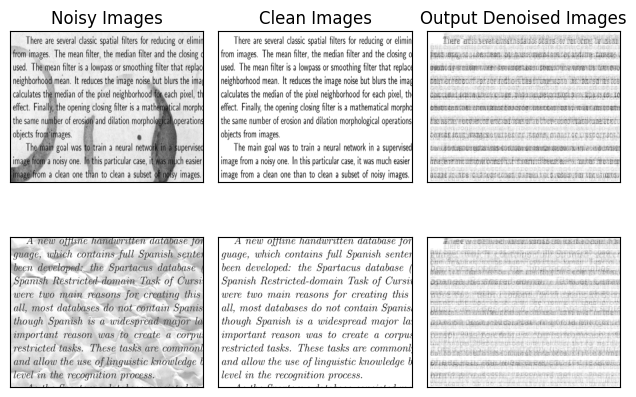

In [4]:
import random
# 결과 출력
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3)

randomly_selected_imgs = random.sample(range(X_test_noisy.shape[0]),2)

for i, ax in enumerate([ax1, ax4]):
  idx = randomly_selected_imgs[i]
  ax.imshow(X_test_noisy[idx].reshape(420,540), cmap='gray')
  if i == 0:
      ax.set_title("Noisy Images")
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

for i, ax in enumerate([ax2, ax5]):
  idx = randomly_selected_imgs[i]
  ax.imshow(X_test_clean[idx].reshape(420,540), cmap='gray')
  if i == 0:
      ax.set_title("Clean Images")
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

for i, ax in enumerate([ax3, ax6]):
  idx = randomly_selected_imgs[i]
  ax.imshow(output[idx].reshape(420,540), cmap='gray')
  if i == 0:
      ax.set_title("Output Denoised Images")
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

plt.tight_layout()
plt.show()

# CNN 활용 노이즈 제거(1 레이어)

In [ ]:
import matplotlib
matplotlib.use("TkAgg")
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D
from matplotlib import pyplot as plt
import numpy as np
import os
import random
from keras.preprocessing.image import load_img, img_to_array


# Import noisy office documents dataset
noisy_imgs_path = 'Noisy_Documents/noisy/'
clean_imgs_path = 'Noisy_Documents/clean/'

X_train_noisy = []
X_train_clean = []

for file in sorted(os.listdir(noisy_imgs_path)):
  img = load_img(noisy_imgs_path+file, color_mode='grayscale', target_size=(420,540))
  img = img_to_array(img).astype('float32')/255
  X_train_noisy.append(img)

for file in sorted(os.listdir(clean_imgs_path)):
  img = load_img(clean_imgs_path+file, color_mode='grayscale', target_size=(420,540))
  img = img_to_array(img).astype('float32')/255
  X_train_clean.append(img) 

# 넘파이 배열로 변환
X_train_noisy = np.array(X_train_noisy)
X_train_clean = np.array(X_train_clean)

# 노이즈 이미지 첫 20개를 테스트 이미지로 사용
X_test_noisy = X_train_noisy[0:20,]
X_train_noisy = X_train_noisy[20:,]

# 정상 이미지 첫 20개를 테스트 이미지로 사용
X_test_clean = X_train_clean[0:20,]
X_train_clean = X_train_clean[20:,]


# 모델 레이어 구성


# 컴파일


# 훈련


# 예측
output = 

### 시각화

In [ ]:
# 결과 출력
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3)

randomly_selected_imgs = random.sample(range(X_test_noisy.shape[0]),2)

for i, ax in enumerate([ax1, ax4]):
  idx = randomly_selected_imgs[i]
  ax.imshow(X_test_noisy[idx].reshape(420,540), cmap='gray')
  if i == 0:
      ax.set_title("Noisy Images")
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

for i, ax in enumerate([ax2, ax5]):
  idx = randomly_selected_imgs[i]
  ax.imshow(X_test_clean[idx].reshape(420,540), cmap='gray')
  if i == 0:
      ax.set_title("Clean Images")
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

for i, ax in enumerate([ax3, ax6]):
  idx = randomly_selected_imgs[i]
  ax.imshow(output[idx].reshape(420,540), cmap='gray')
  if i == 0:
      ax.set_title("Output Denoised Images")
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

plt.tight_layout()
plt.show()

# CNN 활용 노이즈 제거(다층 레이어)

In [1]:
import matplotlib
matplotlib.use("TkAgg")
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D
from matplotlib import pyplot as plt
import numpy as np
import os
import random
from keras.preprocessing.image import load_img, img_to_array

# Import noisy office documents dataset
noisy_imgs_path = 'Noisy_Documents/noisy/'
clean_imgs_path = 'Noisy_Documents/clean/'

X_train_noisy = []
X_train_clean = []

for file in sorted(os.listdir(noisy_imgs_path)):
    img = load_img(noisy_imgs_path+file, color_mode='grayscale', target_size=(420,540))
    img = img_to_array(img).astype('float32')/255
    X_train_noisy.append(img)

for file in sorted(os.listdir(clean_imgs_path)):
    img = load_img(clean_imgs_path+file, color_mode='grayscale', target_size=(420,540))
    img = img_to_array(img).astype('float32')/255
    X_train_clean.append(img)

# 넘파이 배열로 변환
X_train_noisy = np.array(X_train_noisy)
X_train_clean = np.array(X_train_clean)

# 노이즈 이미지 첫 20개를 테스트 이미지로 사용
X_test_noisy = X_train_noisy[0:20,]
X_train_noisy = X_train_noisy[20:,]

# 정상 이미지 첫 20개를 테스트 이미지로 사용
X_test_clean = X_train_clean[0:20,]
X_train_clean = X_train_clean[20:,]


# 모델 레이어 구성
conv_autoencoder = Sequential()
conv_autoencoder.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(420,540,1), activation='relu', padding='same'))
conv_autoencoder.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'))
conv_autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
conv_autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
conv_autoencoder.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'))
conv_autoencoder.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
conv_autoencoder.add(Conv2D(filters=1, kernel_size=(3,3), activation='sigmoid', padding='same'))

# 컴파일
conv_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 훈련
conv_autoencoder.fit(X_train_noisy, X_train_clean, epochs=10)

# 예측
output = conv_autoencoder.predict(X_test_noisy)

c:\Users\qq\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - loss: 0.6808
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - loss: 0.5369
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - loss: 0.3279
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - loss: 0.3109
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - loss: 0.3012
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - loss: 0.2805
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - loss: 0.2558
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - loss: 0.2147
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - loss: 0.1719
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - loss: 0.1518
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


### 시각화

In [2]:
# 결과 출력
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3)

randomly_selected_imgs = random.sample(range(X_test_noisy.shape[0]),2)

for i, ax in enumerate([ax1, ax4]):
    idx = randomly_selected_imgs[i]
    ax.imshow(X_test_noisy[idx].reshape(420,540), cmap='gray')
    if i == 0:
        ax.set_title("Noisy Images")
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

for i, ax in enumerate([ax2, ax5]):
    idx = randomly_selected_imgs[i]
    ax.imshow(X_test_clean[idx].reshape(420,540), cmap='gray')
    if i == 0:
        ax.set_title("Clean Images")
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

for i, ax in enumerate([ax3, ax6]):
    idx = randomly_selected_imgs[i]
    ax.imshow(output[idx].reshape(420,540), cmap='gray')
    if i == 0:
        ax.set_title("Output Denoised Images")
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()
